In [1]:
import numpy as np
import torch
import itertools
import matplotlib.pyplot as plt


%matplotlib inline

# Batch Normalization

Batch normalization was introduced in Sergey Ioffe's and Christian Szegedy's 2015 paper [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf). The idea is that, instead of just normalizing the inputs to the network, we normalize the inputs to _layers within_ the network. It's called "batch" normalization because during training, we normalize each layer's inputs by using the mean and variance of the values in the current mini-batch.




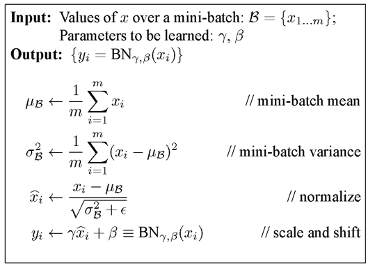

In [2]:
# generiamo un batch di immagini A con una distribuzione normale e del rumore casuale
batch_size = 30
A = torch.zeros(batch_size, 32, 32)

for i in range(batch_size):
    # ogni pixel è ottenuto come: 
    # random(0, 1) * x + b
    A[i, :, :] = torch.randn(32 * 32).view(32, 32) * torch.randint(5, size=(1,)) + torch.randint(50, size=(1,))

A.shape, A

(torch.Size([30, 32, 32]),
 tensor([[[29.4460, 24.1409, 18.8898,  ..., 29.0229, 21.3838, 24.2308],
          [22.3650, 26.8411, 30.0195,  ..., 31.0243, 33.3570, 30.2589],
          [26.5029, 25.2613, 33.4580,  ..., 24.9588, 22.4714, 25.1724],
          ...,
          [27.4161, 22.2326, 21.0175,  ..., 22.3497, 23.1885, 27.8717],
          [21.2230, 23.8045, 24.3639,  ..., 21.8026, 17.2458, 24.6210],
          [24.9259, 24.8786, 22.2930,  ..., 32.6812, 22.8374, 29.7260]],
 
         [[18.8220, 12.7487, 13.7914,  ..., 11.0183, 14.9772,  5.2250],
          [ 9.2212, 14.0907,  9.8331,  ..., 13.6238, 13.7792, 13.2134],
          [10.3500, 12.9360, 14.7754,  ...,  8.8352, 12.0818, 11.2593],
          ...,
          [ 9.6369,  7.0320,  6.9465,  ...,  6.3131,  8.0699,  9.0276],
          [16.4724,  8.2893,  6.4851,  ..., 13.6194,  8.1660,  9.4567],
          [ 8.8602,  7.6444, 12.6571,  ..., 12.2119,  8.0898, 11.6177]],
 
         [[26.7127, 27.2457, 29.0412,  ..., 27.3168, 27.3782, 27.7166],
 

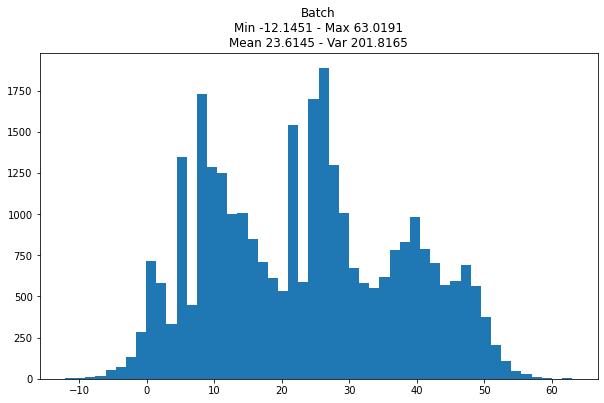

In [10]:
def describe_batch(image_bn, ax1, titleprefix='Batch'):
    
    title=f'{titleprefix}\nMin {image_bn.min():.4f} - Max {image_bn.max():.4f}' \
          f'\nMean {image_bn.mean():.4f} - Var {image_bn.var():.4f}'
    
    ax1.hist(image_bn.flatten().numpy(), bins='auto')
    ax1.set_title(title)
    
    
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
describe_batch(A, ax)

# Stima dei parametri gamma e beta

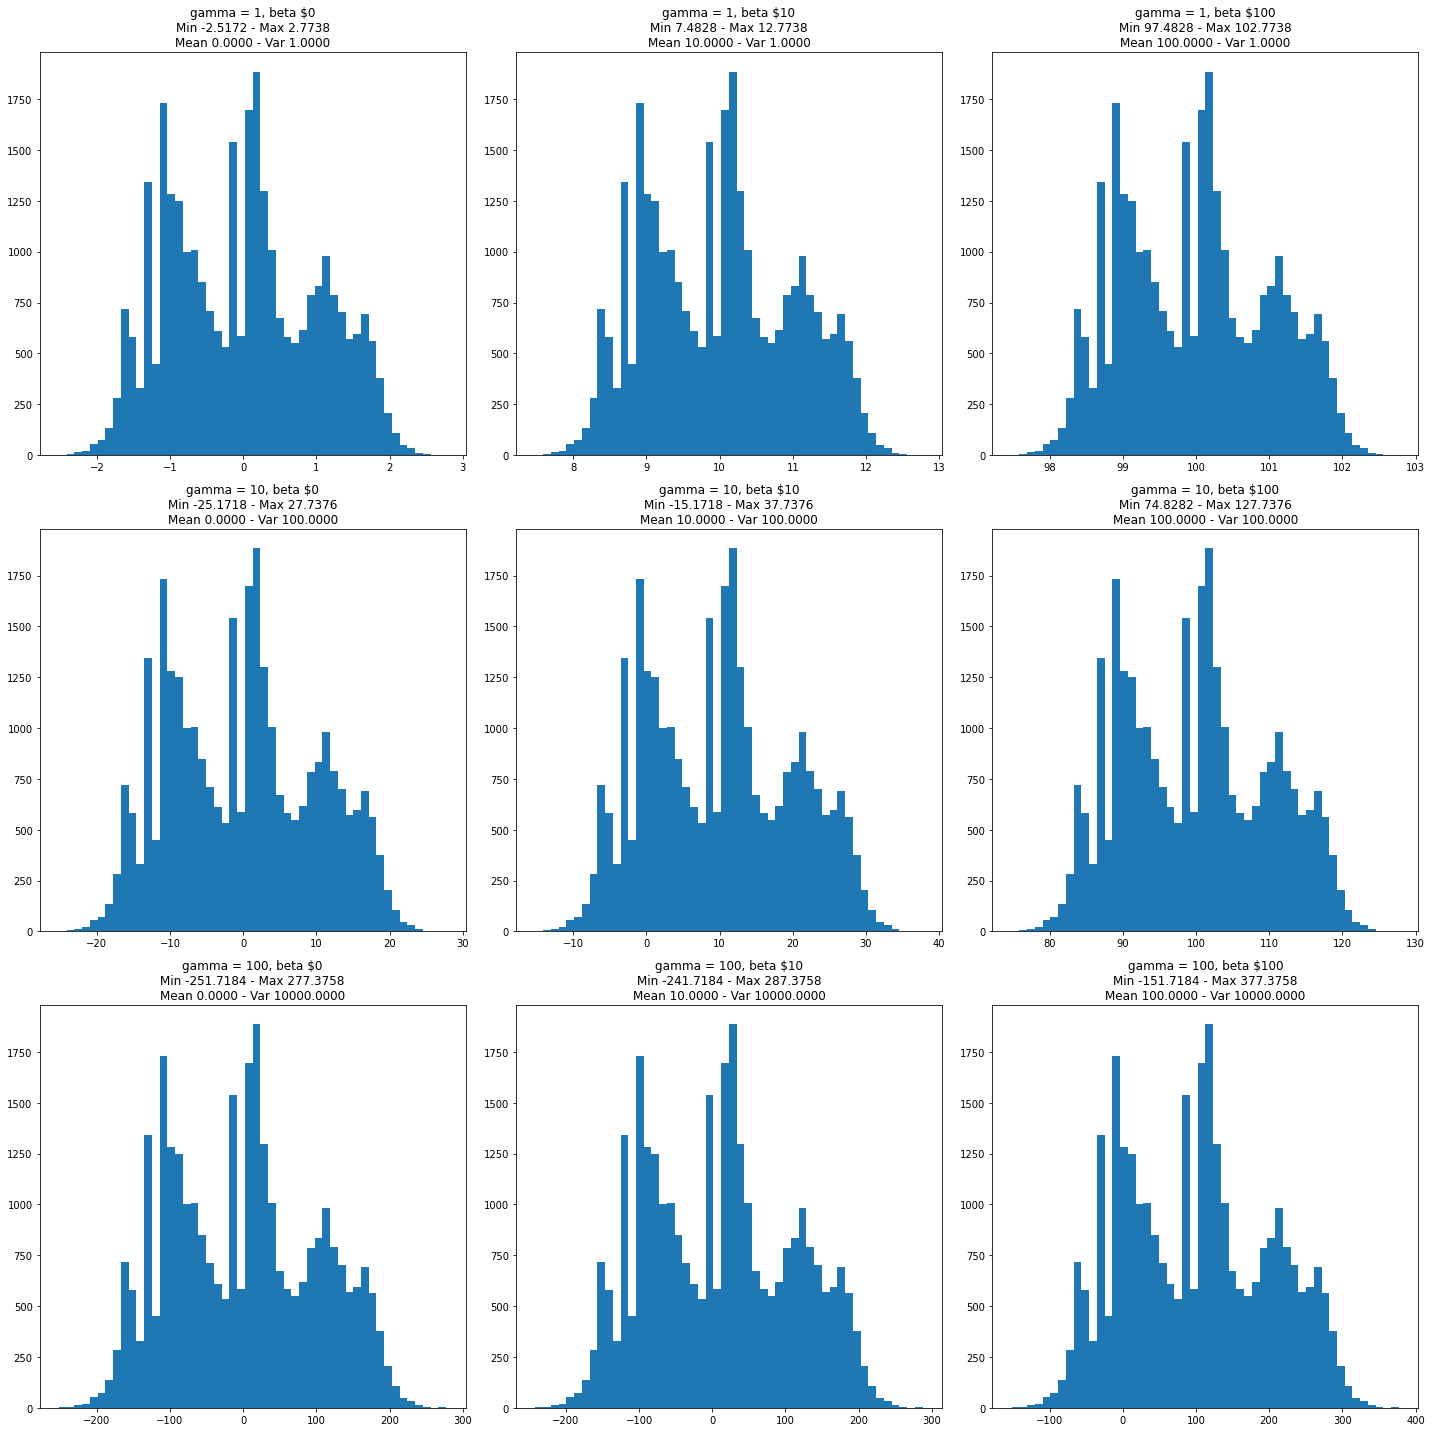

In [11]:
eps = 1e-16
values_gamma = (1, 10, 100)
values_beta = (0, 10, 100)

fig, axes_plot = plt.subplots(3, 3, figsize=(20, 20))

axes = axes_plot.ravel()

for (gamma, beta), ax in zip(itertools.product(values_gamma, values_beta), axes):
    
    correctedA = gamma * (A - A.mean()) / (torch.sqrt(A.var() + eps)) + beta
    describe_batch(correctedA, ax, f'gamma = {gamma}, beta ${beta}')

fig.tight_layout()    